[**OpenAI の API Key**](https://beta.openai.com/account/api-keys) を生成して以下に設定

In [1]:
api_key = 'ここにAPI Keyを入れる'

OpenAI のパッケージをインストール (環境ごとに一度だけ実行)

In [2]:
# !pip install openai

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

画像を表示するためのヘルパー関数 (少し力業)

In [4]:
def showImages(images, titles):
    count = len(titles)
    
    fig = plt.figure()
    fig.set_figwidth(3 * count)
    fig.set_figheight(2 * count)

    for i in range(count):
        ax = fig.add_subplot(1, count, i + 1)
        ax.set_title(titles[i])
        ax.imshow(images[i])
        ax.axis('off')

    fig.show()

In [5]:
import openai

import requests
import io

API Key を設定

In [6]:
openai.api_key = api_key

---

## テキストの内容に応じた画像を生成

In [7]:
response_c = openai.Image.create(
  prompt="日向ぼっこしている猫2匹",
  n=2,
  size="1024x1024"
)

C:\Users\YoshitakaSeo\AppData\Local\Temp\ipykernel_21508\3172494362.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


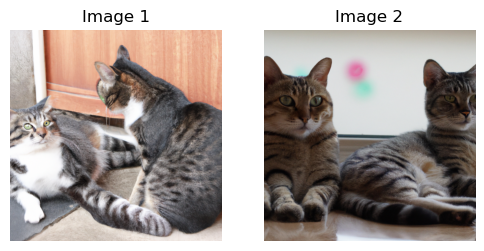

In [8]:
images = [
    Image.open(io.BytesIO(requests.get(response_c['data'][0]['url']).content)),
    Image.open(io.BytesIO(requests.get(response_c['data'][1]['url']).content))
]
titles = ['Image 1', 'Image 2']

showImages(images, titles)

---

## 元画像から類似の画像を生成

In [9]:
sourcename = 'source.png'

In [10]:
response_v = openai.Image.create_variation(
  image=open(sourcename, "rb"),
  n=2,
  size="1024x1024"
)

C:\Users\YoshitakaSeo\AppData\Local\Temp\ipykernel_21508\3172494362.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


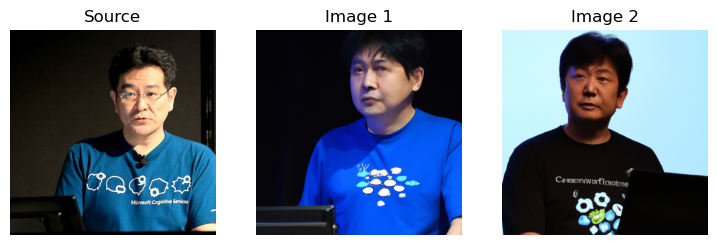

In [11]:
images = [
    imread(sourcename),
    Image.open(io.BytesIO(requests.get(response_v['data'][0]['url']).content)),
    Image.open(io.BytesIO(requests.get(response_v['data'][1]['url']).content))
]
titles = ['Source', 'Image 1', 'Image 2']

showImages(images, titles)

---

## 元画像に対してマスクの箇所をテキストの内容で補完した画像を生成

In [12]:
maskname = 'mask.png'

In [13]:
response_e = openai.Image.create_edit(
  image=open(sourcename, "rb"),
  mask=open(maskname, "rb"),
  prompt="セミロングの女性が講演している",
  n=2,
  size="1024x1024"
)

C:\Users\YoshitakaSeo\AppData\Local\Temp\ipykernel_21508\3172494362.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


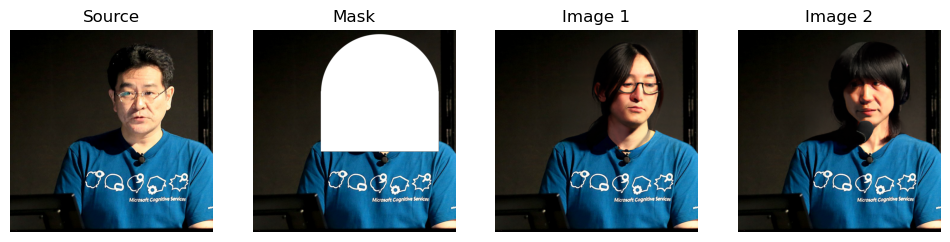

In [14]:
images = [
    imread(sourcename),
    imread(maskname),
    Image.open(io.BytesIO(requests.get(response_e['data'][0]['url']).content)),
    Image.open(io.BytesIO(requests.get(response_e['data'][1]['url']).content))
]
titles = ['Source', 'Mask', 'Image 1', 'Image 2']

showImages(images, titles)